<a href="https://colab.research.google.com/github/meher-chinmaya/Practice-DL/blob/main/MLP_Tensorflow2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MLP Initialization

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, Model
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST Data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and Flatten
x_train = x_train.reshape(-1, 784).astype('float32') / 255.
x_test = x_test.reshape(-1, 784).astype('float32') / 255.
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# Parameters
n_hidden_1 = 512
n_hidden_2 = 128
n_input = 784
n_classes = 10
training_epochs = 10
learning_rate = 0.001
batch_size = 100

# Plotting Function
def plt_dynamic(x, y, y_1, ax, ticks, title, colors=['b']):
    ax.clear()
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    plt.legend()
    plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Model 1
*   input (784)
*   sigmoid(512)
*   sigmoid(128)
*   softmax(output 10)

In [2]:
# Define the Model
class MLP(Model):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = layers.Dense(n_hidden_1, activation='sigmoid',
                                kernel_initializer=tf.random_normal_initializer(mean=0., stddev=0.039))
        self.fc2 = layers.Dense(n_hidden_2, activation='sigmoid',
                                kernel_initializer=tf.random_normal_initializer(mean=0., stddev=0.055))
        self.out = layers.Dense(n_classes, activation='sigmoid',
                                kernel_initializer=tf.random_normal_initializer(mean=0., stddev=0.120))

    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        return x

model = MLP()

# Optimizer and Loss
loss_object = losses.CategoricalCrossentropy(from_logits=False)
optimizer = optimizers.Adam(learning_rate=learning_rate)

Epoch 0: Train Loss: 0.4976, Test Loss: 0.2341, Train Accuracy: 0.0000, Test Accuracy: 0.0000
Epoch 1: Train Loss: 0.2071, Test Loss: 0.1682, Train Accuracy: 0.0000, Test Accuracy: 0.0000
Epoch 2: Train Loss: 0.1505, Test Loss: 0.1325, Train Accuracy: 0.0000, Test Accuracy: 0.0000
Epoch 3: Train Loss: 0.1125, Test Loss: 0.1080, Train Accuracy: 0.0000, Test Accuracy: 0.0000
Epoch 4: Train Loss: 0.0873, Test Loss: 0.0943, Train Accuracy: 0.0000, Test Accuracy: 0.0000
Epoch 5: Train Loss: 0.0676, Test Loss: 0.0913, Train Accuracy: 0.0000, Test Accuracy: 0.0000
Epoch 6: Train Loss: 0.0541, Test Loss: 0.0710, Train Accuracy: 0.0000, Test Accuracy: 0.0000
Epoch 7: Train Loss: 0.0429, Test Loss: 0.0676, Train Accuracy: 0.0000, Test Accuracy: 0.0000
Epoch 8: Train Loss: 0.0344, Test Loss: 0.0641, Train Accuracy: 0.0000, Test Accuracy: 0.0000
Epoch 9: Train Loss: 0.0281, Test Loss: 0.0651, Train Accuracy: 0.0000, Test Accuracy: 0.0000


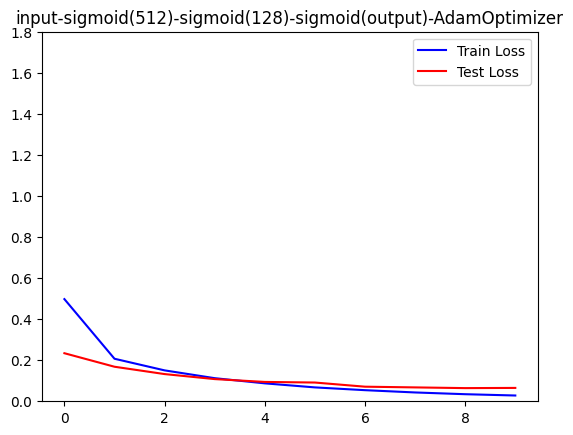

In [3]:
# Training Loop
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(60000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

train_loss_results = []
test_loss_results = []
epochs = []

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')


for epoch in range(training_epochs):
    train_loss = tf.metrics.Mean()
    test_loss = tf.metrics.Mean()
    train_accuracy = tf.metrics.Accuracy()
    test_accuracy = tf.metrics.Accuracy()

    # Training loop
    for images, labels in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(images)
            loss = loss_object(labels, predictions)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        train_loss.update_state(loss)
        train_accuracy.update_state(labels, predictions)

    # Testing loop
    for test_images, test_labels in test_dataset:
        test_predictions = model(test_images)
        t_loss = loss_object(test_labels, test_predictions)
        test_loss.update_state(t_loss)
        test_accuracy.update_state(test_labels, test_predictions)

    train_acc = train_accuracy.result().numpy()
    test_acc = test_accuracy.result().numpy()

    # Record loss
    train_loss_results.append(train_loss.result())
    test_loss_results.append(test_loss.result())
    epochs.append(epoch)

    if epoch % 1 == 0:
        print(f"Epoch {epoch}: Train Loss: {train_loss.result():.4f}, Test Loss: {test_loss.result():.4f}, "
            f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    ticks = np.arange(0, 2, step=0.2)
    plt_dynamic(epochs, train_loss_results, test_loss_results, ax, ticks, title="input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")

plt.show()